# Reduction pipeline

In [1]:
import drivers
import create_config
import aodirs as aodirs
import importlib
import add_dark_exp as ad
import check_logsheet as c
import pandas as pd
import insts as i
import flats
import registration as reg
from skimage.feature import peak_local_max
import os
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
instrument = i.PHARO()

First, run the check logsheet function. This adds dark exposures, highlights any potential typos.

In [ ]:
c.check_logsheet(instrument, date='Palomar_logsheets_201604')

In [4]:
create_config.cc(instrument, 'Palomar_logsheets_201604')

Next, read in the logsheet and create the config file.

Finally, run all drivers.

Running skies:   0%|          | 0/24 [00:00<?, ?it/s]/Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/sky.py:73: RuntimeWarning: invalid value encountered in true_divide
  sky_array[i, :, :] = sky_array[i, :, :] / flat
Running image driver:   0%|          | 0/24 [00:00<?, ?it/s]/Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/image.py:93: RuntimeWarning: invalid value encountered in true_divide
  current_im = (current_im / flat) - sky  #where flat = 0, this will be nan
Running registration:   0%|          | 0/24 [00:00<?, ?it/s]/Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/registration.py:268: RuntimeWarning: invalid value encountered in less
  image[np.where(image < 0.)] = 0.
Running registration: 100%|██████████| 24/24 [1:23:20<00:00, 213.80s/it]


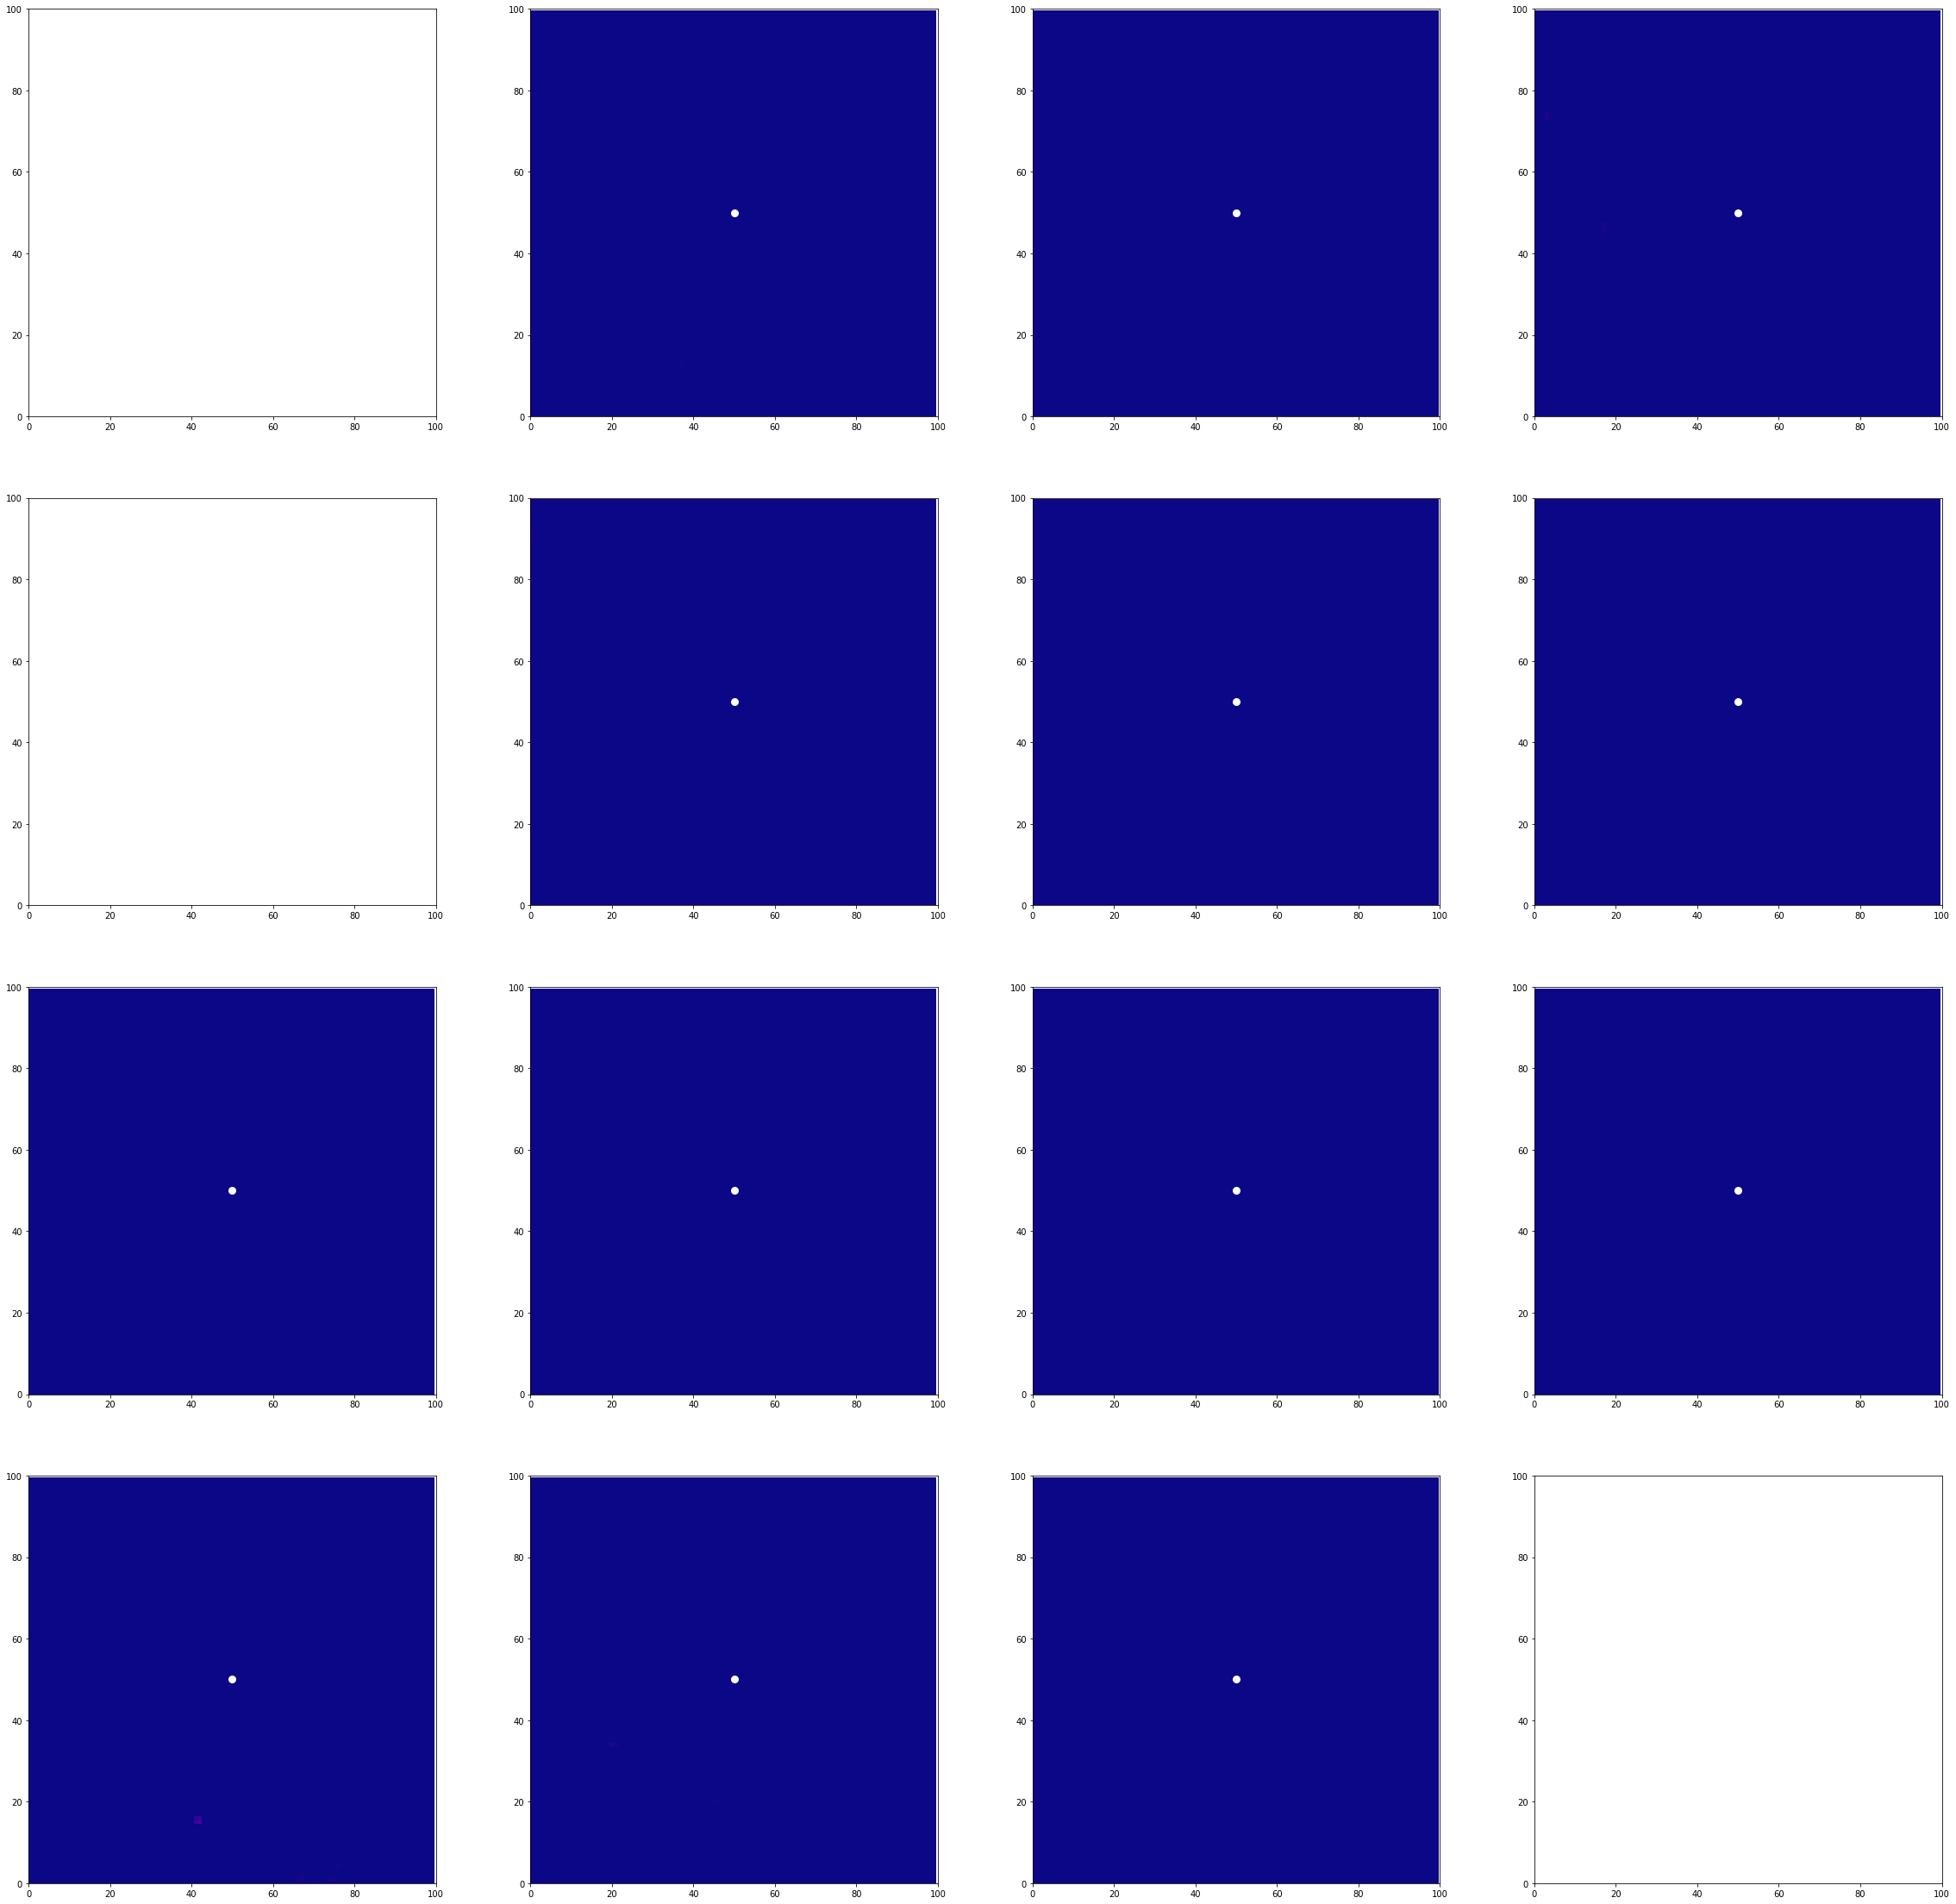

In [3]:
drivers.all_driver(instrument)

In [79]:
os.chdir('/Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/tests/sky_test/Ks/')
file = 'sh02.fits'
# os.chdir('/Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/tests/PHARO_integration')
# file = 'sph0079.fits'
data = pyfits.getdata(file, 0)

brute, max_coord = reg.register_find_peak(data)
brute_x, brute_y = max_coord

> /Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/registration.py(51)find_peak()
     50     #     ipdb.set_trace()
---> 51     #     arr, index = np.unravel_index(np.argmax(image_searched, axis=None), image_searched.shape)
     52     #     arr_dict = {0: (sh[0] // 2, index), 1: (index, sh[1] // 2), 2: (0, index),\

ipdb> 
ipdb> c
> /Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/registration.py(88)check_peak()
     87     #     ipdb.set_trace()
---> 88     #     if np.all(surrounding_im <= image[coord]):
     89     #         return coord

ipdb> c
> /Users/arjunsavel/Desktop/research/observations/shane/shane-reduction/simmer/registration.py(58)find_peak()
     57     #     ipdb.set_trace()
---> 58     #     if np.all(checked == max_coord): # the max coord is this coord
     59     #         return max_coord

ipdb> c


In [80]:
for j in range(len(data)):
    for k in range(len(data[i])):
        if data[j][k] < 0:
            data[j][k] = 0

In [108]:
image = data


def find_thresh(image):
#     threshold = 40000
    max_val = np.max(image)
    min_val = 0
#     coordinates = peak_local_max(image, min_distance=100, threshold_abs=threshold)
    # now do binary search
    lower_bound = min_val
    upper_bound = max_val
    while lower_bound <= upper_bound:
        threshold = np.floor((lower_bound + upper_bound) / 2)
        coordinates = peak_local_max(image, min_distance=100, threshold_abs=threshold)
        if len(coordinates) > 3:
            lower_bound = threshold + 1
        elif len(coordinates) == 0:
            uppwer_bound = threshold - 1
        else:
            return coordinates
    return []
        
#     if len(coordinates) > 3:
#         while len(coordinates) > 3:
#             if threshold > np.max(image):
#                 return []
#             threshold += 100
#             coordinates = peak_local_max(image, min_distance=100, threshold_abs=threshold)
#     elif len(coordinates) == 0:
#         while len(coordinates) == 0:
#             if threshold <= 0:
#                 print('Ahh, too low.')
#                 return []
#             threshold -= 50
#             coordinates = peak_local_max(image, min_distance=100, threshold_abs=threshold)
#     return coordinates

In [109]:
find_thresh(image) # binary search implementation

array([[302, 301]])

In [102]:
find_thresh(image) # old implementation

array([[302, 301]])

In [86]:
%timeit find_thresh(image) # old implementation

8.29 s ± 799 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%timeit find_thresh(image) # binary search

12 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
8.29/12e-3

690.8333333333333

In [ ]:
coordinates
len(coordinates)

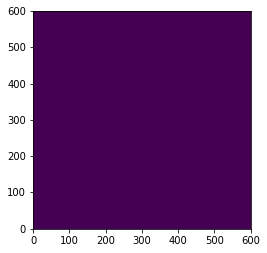

In [71]:
plt.imshow(data, origin='lower')
# plt.scatter(y,x, color='black', marker='*')


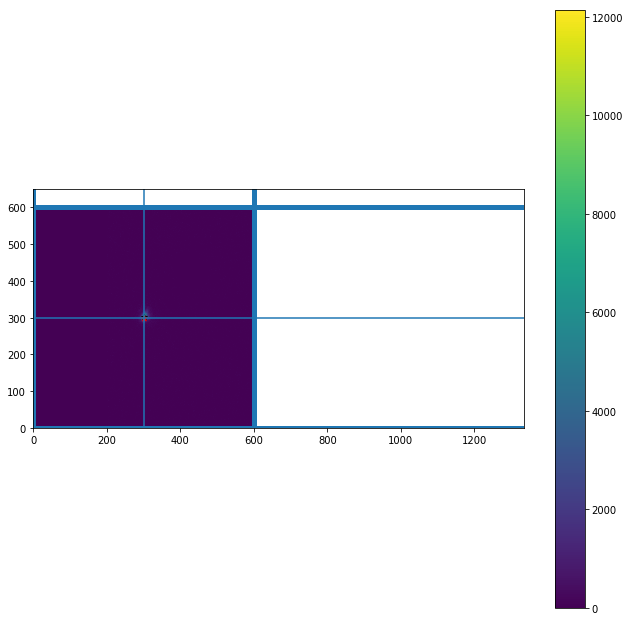

In [57]:
plt.figure(figsize=(11,11))

# plt.imshow(np.log10(data), origin='lower')
plt.imshow(data, origin='lower')
plt.colorbar()
plt.scatter(y,x, color='black', marker='*')
plt.scatter(brute_y,brute_x, color='red', marker='*')
plt.scatter(testy,testx, color='white', marker='*')
plt.axvline(x=len(data[1])/2)
plt.axvline(x=0, lw=5)
plt.axvline(x=len(data[1]), lw=5)
plt.axhline(y=len(data[1]), lw=5)
plt.axhline(y=0, lw=5)
plt.axhline(y=len(data[1])/2)
# plt.scatter([542],[559], color='red')

In [19]:
testx, testy = np.unravel_index(np.argmax(data, axis=None), data.shape)

In [16]:
import ipdb

In [24]:
check_peak(data, coordinates[0]) == coordinates[0]

> <ipython-input-22-f88721c6eac4>(14)check_peak()
     13         ipdb.set_trace()
---> 14         if np.all(surrounding_im <= image[coord[0]][coord[1]]):
     15             return coord

ipdb> c


array([ True,  True])

In [22]:
def check_peak(image, coord):
        """
        Returns
        """
        sh = np.shape(image)
        max_row = min(coord[0] + 1, sh[0] - 1)
        max_col = min(coord[1] + 1, sh[1] - 1)
        min_row = max(coord[0] - 1, 0)
        min_col = max(coord[1] - 1, 0)

        surrounding_im = image[min_row : max_row + 1, \
                                min_col : max_col + 1]
        ipdb.set_trace()
        if np.all(surrounding_im <= image[coord[0]][coord[1]]):
            return coord
        else:
            row, col = np.unravel_index(np.argmax(surrounding_im, axis=None), 
                    surrounding_im.shape)
            scaled_row = (row - 1) + coord[0]
            scaled_col = (col - 1) + coord[1]
            max_searched_coord = (scaled_row, scaled_col)
            return max_searched_coord

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


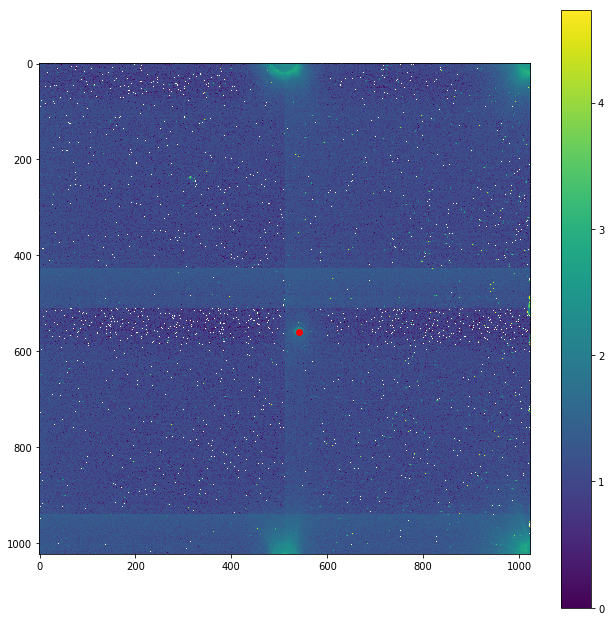

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
threshold = 4.7

plt.imshow(np.log10(data))
plt.colorbar()
plt.scatter([542],[559], color='red')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


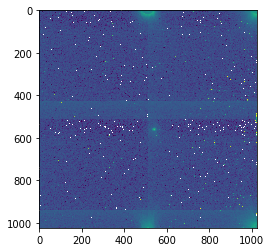

In [19]:
plt.imshow(np.log10(data))

In [ ]:
np.argmax()

In [16]:
data[max_coord], data[542, 559]

(47895.0, 9.0)

In [9]:
data.shape[0]//2

512

In [6]:
data[max_coord]

3781.0

In [7]:
sat, rot, newshifts1 = reg.register_saturated(data, 10, [])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


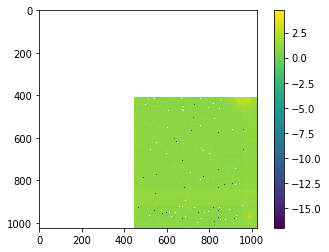

In [9]:
plt.imshow(np.log10(brute))
plt.colorbar()

In [ ]:
ma

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


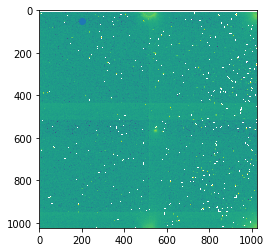

In [16]:
plt.imshow(np.log10(sat))
plt.scatter([200],[50])
# plt.colorbar()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


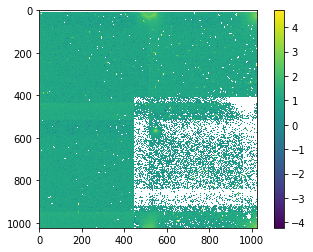

In [11]:
plt.imshow(np.log10(sat - brute))
plt.colorbar()